In [48]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
d = load_breast_cancer()

In [4]:
print(d.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df_bc = pd.DataFrame(data=d.data,columns=d.feature_names)

In [9]:
df_bc['target'] = d.target

In [10]:
df_bc['target_name'] = [d.target_names[x] for x in d.target]

mean radius


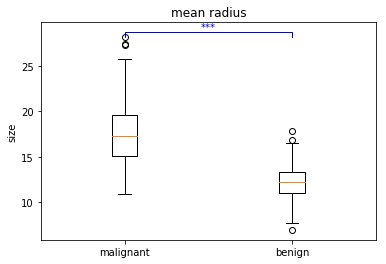

mean texture


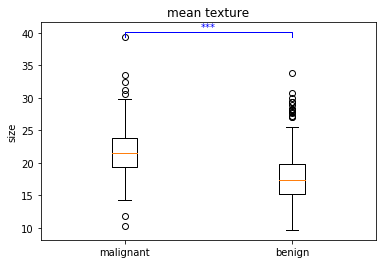

mean perimeter


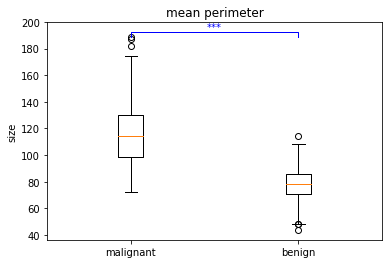

mean area


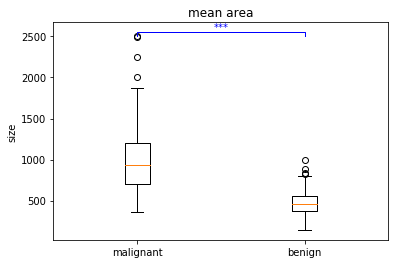

mean smoothness


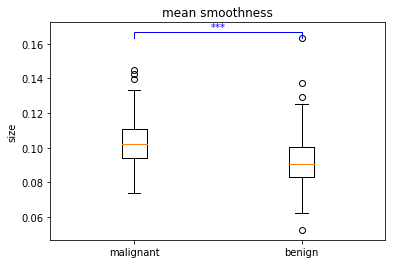

mean compactness


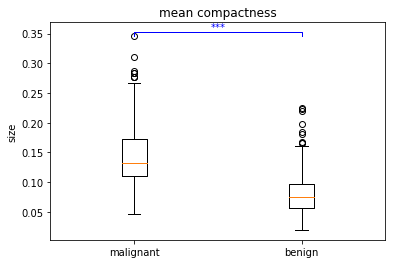

mean concavity


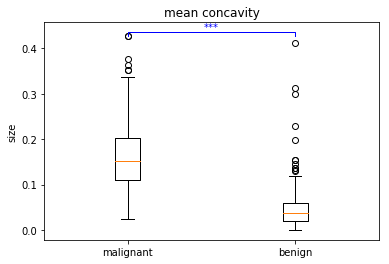

mean concave points


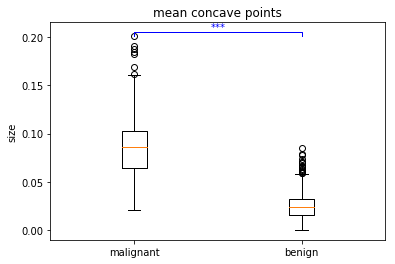

mean symmetry


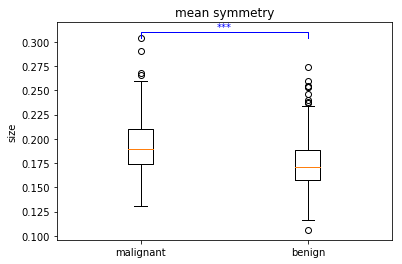

mean fractal dimension


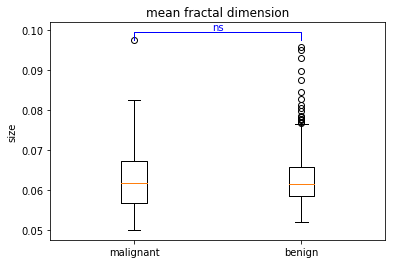

radius error


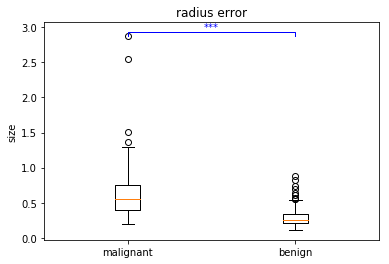

texture error


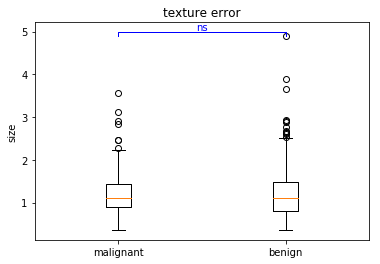

perimeter error


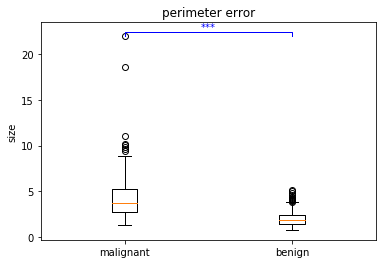

area error


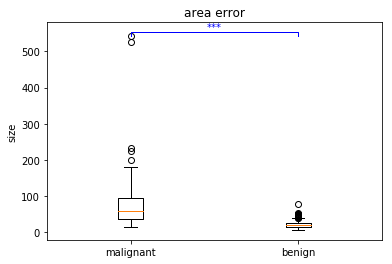

smoothness error


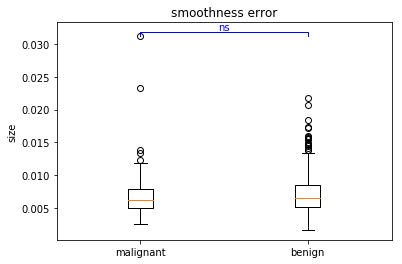

compactness error


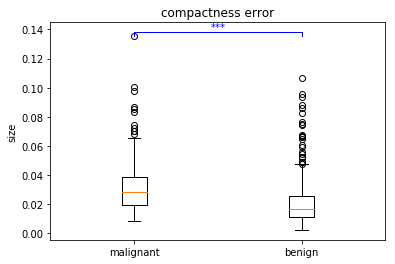

concavity error


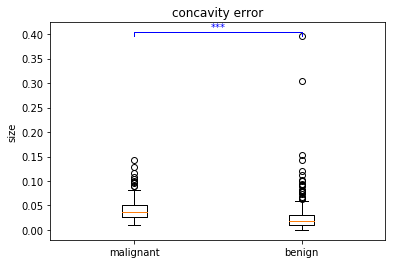

concave points error


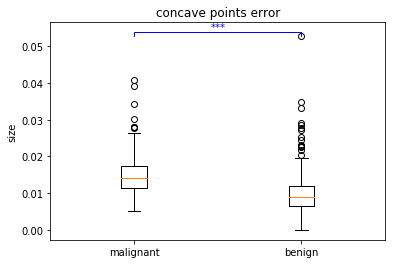

symmetry error


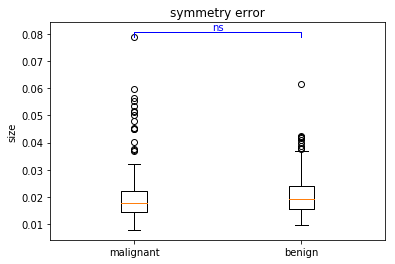

fractal dimension error


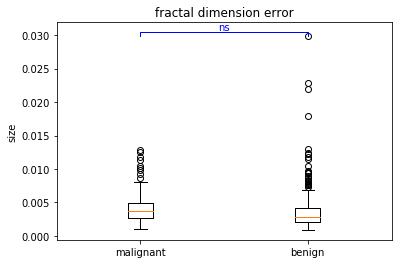

worst radius


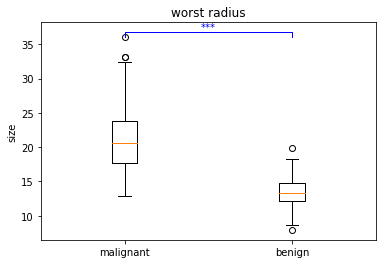

worst texture


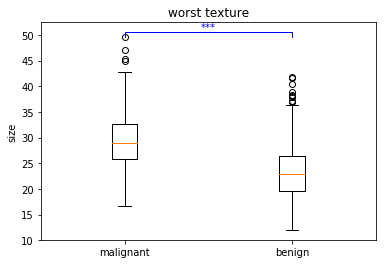

worst perimeter


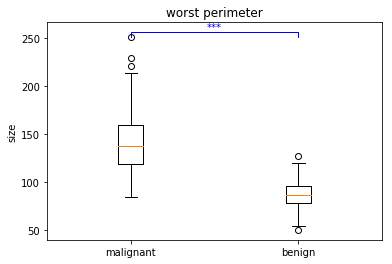

worst area


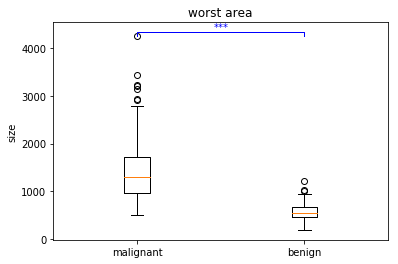

worst smoothness


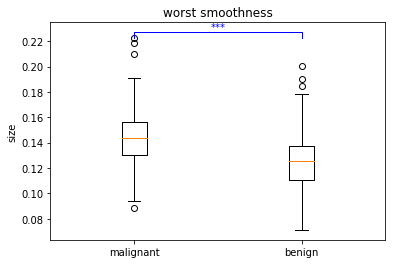

worst compactness


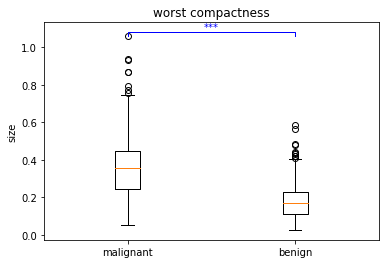

worst concavity


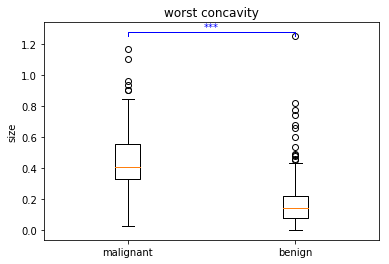

worst concave points


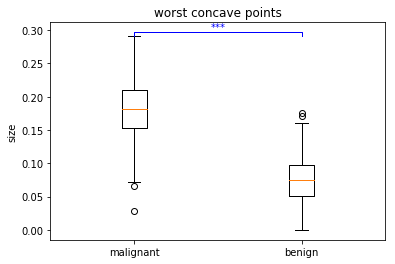

worst symmetry


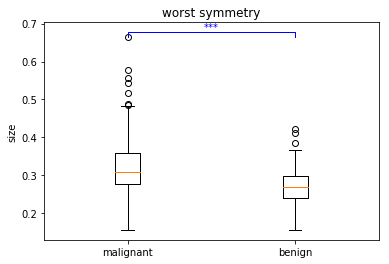

worst fractal dimension


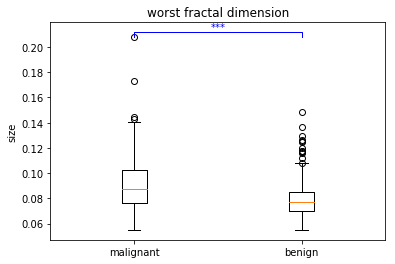

In [66]:
for feature_name in d.feature_names:
    print(feature_name)
    m  = df_bc.target == 0
    m1 = df_bc.target == 1

    a = df_bc[m][feature_name].values
    b = df_bc[m1][feature_name].values

    t,p = ttest_ind(a,b)
    m1  = (p < 0.05) & (p >= 0.01)
    m2  = (p < 0.01) & (p >= 0.001)
    m3  = (p < 0.001)
    m4  = (p >= 0.05)
    m   = np.array([m1,m2,m3,m4])

    sig_list = np.array(['*','**','***','ns'])
    sig      = sig_list[m][0]

    plt.boxplot([a,b])
    plt.xticks([1,2],d.target_names)
    x1, x2    = 1,2   
    y, h      = np.max(np.concatenate([a,b])), np.max(np.concatenate([a,b]))*0.02
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='b')
    plt.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='b')
    plt.ylabel('size')
    plt.title(feature_name)
    plt.show()